## Monthly temperature warming pattersn

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader 
from palettable.cmocean.sequential import Matter_10
from palettable.cartocolors.sequential import RedOr_6

from ideotype.data_process import read_data
from ideotype.weafile_process import get_scale_ratio

In [3]:
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    '/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_present.yml')

In [2]:
run_name = 'present'
climate_factor = 'T'
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [4]:
run_name = 'present'
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

temp_scales = get_scale_ratio(run_name, 'T', 0)
rh_scales = get_scale_ratio(run_name, 'RH', 5)


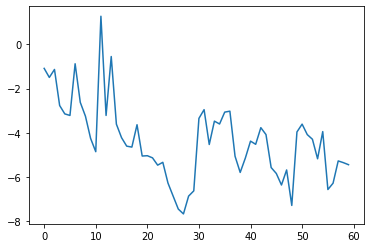

In [11]:
rh_scales = get_scale_ratio(run_name, 'RH', 5)
plt.plot([rh_scale*3.1 for rh_scale in rh_scales])

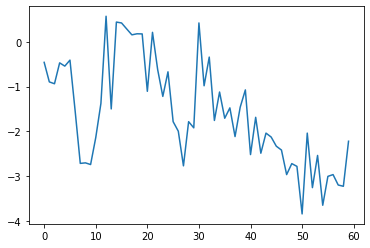

In [34]:
plt.plot([rh_scale*3.1 for rh_scale in rh_scales])

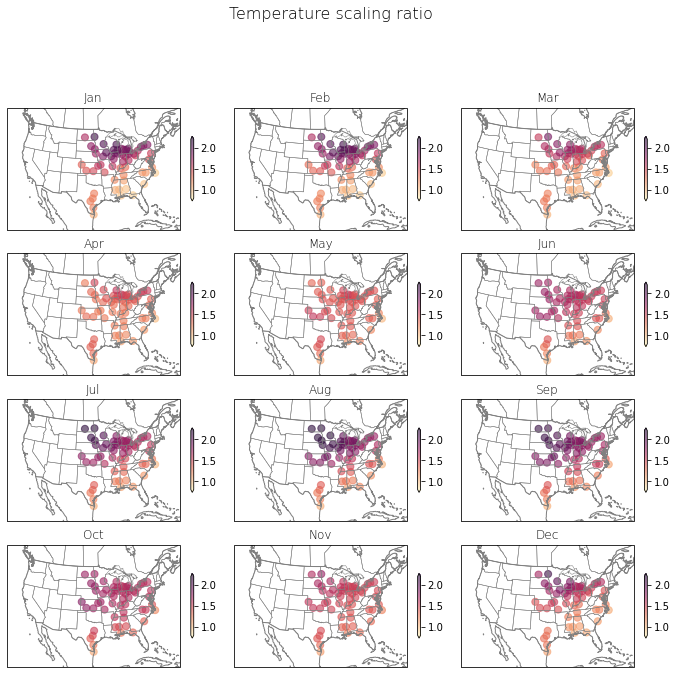

In [15]:
climate_factor = 'T'

fig = plt.figure(figsize=(12,14))
extent = [-123, -72, 19, 53]

for month in np.arange(len(months)):
    ax = fig.add_subplot(4,3,month+1, projection=ccrs.AlbersEqualArea(
        central_latitude=39.5, central_longitude=-98.35))

    temp_scales = get_scale_ratio(run_name, climate_factor, month)
    mp = ax.scatter(df_sites.lon, df_sites.lat, transform = ccrs.PlateCarree(),
               c=temp_scales, cmap=Matter_10.mpl_colormap, 
               vmin=0.8, vmax=2.2, s=50, alpha=0.6)
    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)    
    ax.set_title(f'{months[month]}', fontweight='light', fontsize=12)
    fig.colorbar(mp, shrink=0.2, extend='both')

fig.subplots_adjust(hspace=-0.55, wspace=0.05)
fig.suptitle('Temperature scaling ratio', y=0.88, fontweight='light', fontsize=16)

plt.savefig('/home/disk/eos8/ach315/upscale/figs/temp_scaling_map.png', format='png', dpi=800)

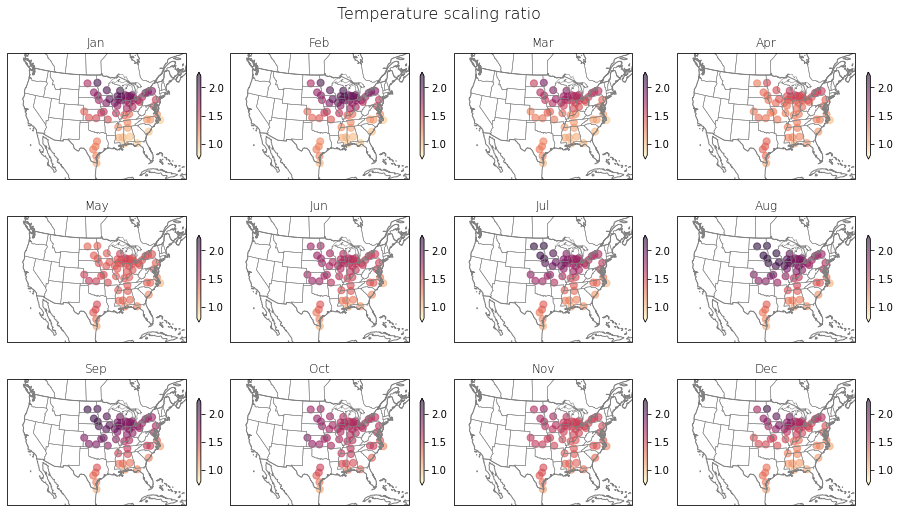

In [5]:
from palettable.cmocean.sequential import Matter_10
from palettable.cartocolors.sequential import RedOr_6


fig = plt.figure(figsize=(16,10))
extent = [-123, -72, 19, 53]

for month in np.arange(len(months)):
    ax = fig.add_subplot(3,4,month+1, projection=ccrs.AlbersEqualArea(
        central_latitude=39.5, central_longitude=-98.35))

    temp_scales = get_scale_ratio(run_name, climate_factor, month)
    mp = ax.scatter(df_sites.lon, df_sites.lat, transform = ccrs.PlateCarree(),
               c=temp_scales, cmap=Matter_10.mpl_colormap, 
               vmin=0.8, vmax=2.2, s=50, alpha=0.6)
    ax.set_extent(extent)
    ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)    
    ax.set_title(f'{months[month]}', fontweight='light', fontsize=12)
    fig.colorbar(mp, shrink=0.4, extend='both')

fig.subplots_adjust(hspace=-0.25, wspace=0)
fig.suptitle('Temperature scaling ratio', y=0.88, fontweight='light', fontsize=16)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/temp_scaling_map.png', format='png', dpi=800)